In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
def HH(Vm, n0, h0, m0, ENa, EK, Cm, gK0, gNa0, gL, EL , I, time, dt):
    V, n, h, m = Vm, n0, h0, m0
    Vlist = [V]
    gNaList = [gNa0]
    gKList = [gK0]
    mList = [m]
    nList = [n]
    hList = [h]
    INaList = []
    IKList = []
    for t in range(len(time)):
        gNa  = gNa0*m**3*h             
        gK   = gK0*n**4   
        INa = gNa0 * m**3 * h * (V - ENa)
        IK = gK0  * n**4 * (V - EK)
        IL = gL * (V - EL)
        dv = (I[t] - INa - IK - IL)/Cm
        an = 0.02*(V-25)/(1-np.exp((25-V) / 9.0))
        bn = -0.002*(V-25)/(1-np.exp((V-25) / 9.0))
        am =  0.182*(V+35)/(1-np.exp((-35-V) / 9.0))
        bm = -0.124*(V+35)/(1-np.exp((V+35) / 9.0))
        ah = 0.25*np.exp(-(V+90) / 12.0)
        bh = 0.25*np.exp((V+62) / 6.0)/np.exp((V+90) / 12.0)
        dm = am*(1.0-m) - bm*m
        dh = ah*(1.0-h) - bh*h
        dn = an*(1.0-n) - bn*n
        V = V + dv*dt
        m = m + dm*dt
        h = h + dh*dt
        n = n + dn*dt
        Vlist.append(V)
        gNaList.append(gNa)
        gKList.append(gK)
        mList.append(m)
        nList.append(n)
        hList.append(h)
        INaList.append(INa)
        IKList.append(IK)
    return Vlist,gNaList,gKList,mList,nList,hList,INaList,IKList

Q1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


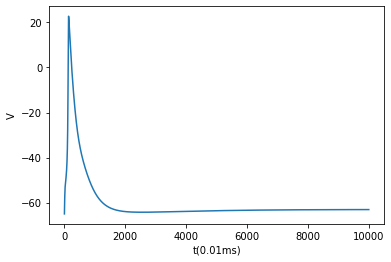

2.3000000000000003


In [ ]:
Cm  =   1
gNa = 40.0
gK  =  35.0
gL  =   0.3
ENa =  55.0
EK  = -77.0
EL  = -65
time = sp.arange(0.0, 100.0, 0.01)
I = [20*(t<0.2) for t in time]
Vlist,gNaList,gKList,mList,nList,hList,INaList,IKList= HH(-65, 0.05, 0.6, 0.3, ENa, EK, Cm, gK, gNa, gL, EL , I, time, dt = 0.01)
plt.plot(Vlist)
plt.xlabel("t(0.01ms)")
plt.ylabel("V")
plt.show()
tmp = np.where(np.array(Vlist) >= 0)[0]
width = 2*(tmp[-1]-tmp[0])*0.01
print(width)

In [ ]:
for widthG in [2.7, 3, 3.3, 3.7, 5]:
    for i in [j/10+3 for j in range(300)]:
        I = [i for t in time]
        V,_,_,_,_,_,_,_ = HH(-65, 0.05, 0.6, 0.3, ENa, EK, Cm, gK, gNa, gL, EL , I, time, dt = 0.01)
        tmp = np.where(np.array(V) >= 0)[0]
        width = 2*(tmp[-1]-tmp[0])*0.01
        if width>widthG:
            Imin = i
            break
    print("min I for width = "+str(widthG)+" is : "+str(Imin))

min I for width = 2.7 is : 3.9
min I for width = 3 is : 6.1
min I for width = 3.3 is : 8.0
min I for width = 3.7 is : 10.3
min I for width = 5 is : 16.8


Q2 and Q3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


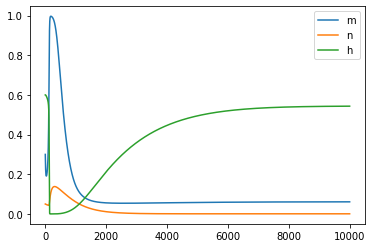

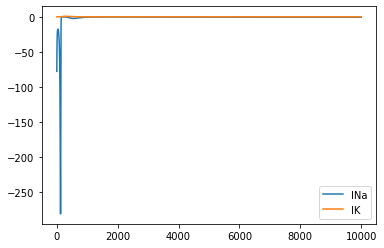

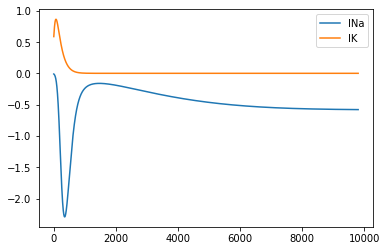

In [ ]:
Cm  =   1
gNa = 40.0
gK  =  35.0
gL  =   0.3
ENa =  55.0
EK  = -77.0
EL  = -65
time = sp.arange(0.0, 100.0, 0.01)
I = [20*(t<0.2) for t in time]
Vlist,gNaList,gKList,mList,nList,hList,INaList,IKList= HH(-65, 0.05, 0.6, 0.3, ENa, EK, Cm, gK, gNa, gL, EL , I, time, dt = 0.01)
plt.plot(mList, label = "m")
plt.plot(nList, label = "n")
plt.plot(hList, label = "h")
plt.legend()
plt.show()
plt.plot(INaList, label = "INa")
plt.plot(IKList, label = "IK")
plt.legend()
plt.show()
plt.plot(INaList[200:], label = "INa")
plt.plot(IKList[200:], label = "IK")
plt.legend()
plt.show()

Q4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


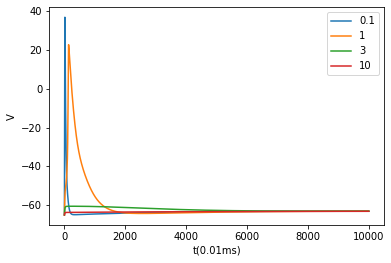

In [ ]:
Cm  =   1
gNa = 40.0
gK  =  35.0
gL  =   0.3
ENa =  55.0
EK  = -77.0
EL  = -65
time = sp.arange(0.0, 100.0, 0.01)
I = [20*(t<0.2) for t in time]
VlistCm = {}
for Cmp in [0.1, 1, 3, 10]:
    Vlist,gNaList,gKList,mList,nList,hList,INaList,IKList= HH(-65, 0.05, 0.6, 0.3, ENa, EK, Cmp, gK, gNa, gL, EL , I, time, dt = 0.01)
    VlistCm[str(Cmp)] = Vlist
for k in VlistCm.keys():
    plt.plot(VlistCm[k], label = k)
plt.xlabel("t(0.01ms)")
plt.ylabel("V")
plt.legend()
plt.show()

Q5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


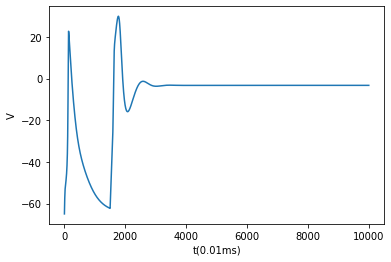

35.800000000000004


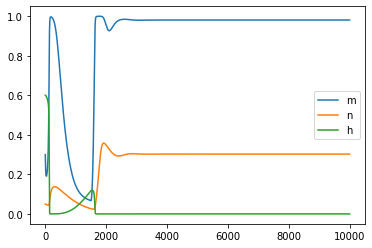

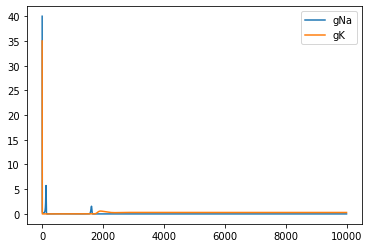

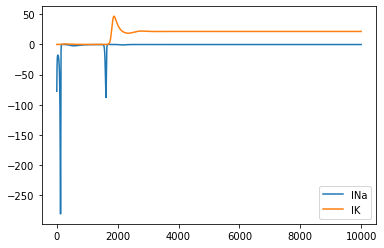

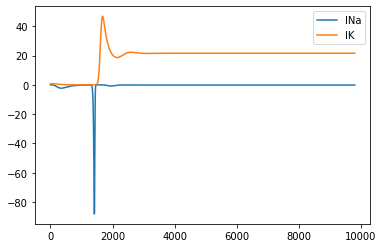

In [ ]:
Cm  =   1
gNa = 40.0
gK  =  35.0
gL  =   0.3
ENa =  55.0
EK  = -77.0
EL  = -65
time = sp.arange(0.0, 100.0, 0.01)
I = [20*(t<0.2)+40*(t>15) for t in time]
Vlist,gNaList,gKList,mList,nList,hList,INaList,IKList= HH(-65, 0.05, 0.6, 0.3, ENa, EK, Cm, gK, gNa, gL, EL , I, time, dt = 0.01)
plt.plot(Vlist)
plt.xlabel("t(0.01ms)")
plt.ylabel("V")
plt.show()
tmp = np.where(np.array(Vlist) >= 0)[0]
width = 2*(tmp[-1]-tmp[0])*0.01
print(width)
plt.plot(mList, label = "m")
plt.plot(nList, label = "n")
plt.plot(hList, label = "h")
plt.legend()
plt.show()
plt.plot(gNaList, label = "gNa")
plt.plot(gKList, label = "gK")
plt.legend()
plt.show()
plt.plot(INaList, label = "INa")
plt.plot(IKList, label = "IK")
plt.legend()
plt.show()
plt.plot(INaList[200:], label = "INa")
plt.plot(IKList[200:], label = "IK")
plt.legend()
plt.show()